In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Sıcaklık Tahmini
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

## 2. Ev fiyatları
Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter notebooku gönderin:

Ev Fiyatları verilerini Kaggle'dan indirin.
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [2]:
sicaklik = pd.read_csv("data/weatherHistory.csv")
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
sicaklik.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
Y = sicaklik['Apparent Temperature (C)']

X = sicaklik[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)' , 'Pressure (millibars)']]

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.55395113e+01 -3.22375796e-01  5.08683496e-03 -5.80345617e-04]
Sabit değer (bias): 
 40.08646279077777


In [7]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.405
Model:                                  OLS   Adj. R-squared:                  0.405
Method:                       Least Squares   F-statistic:                 1.639e+04
Date:                      Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                              18:47:16   Log-Likelihood:            -3.4044e+05
No. Observations:                     96453   AIC:                         6.809e+05
Df Residuals:                         96448   BIC:                         6.809e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.0865      0.265    151.491      0.000      39.568      40.605
Humidity                 -35.5395      0.140   -254.610      0.000     -35.813     -35.266
Wind Speed (km/h)         -0.3224      0.004    -81.150      0.000      -0.330      -0.315
Wind Bearing (degrees)     0.0051      0.000     20.435      0.000       0.005       0.006
Pressure (millibars)      -0.0006      0.000     -2.551      0.011      -0.001      -0.000
==============================================================================
Omnibus:                     3414.455   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3814.376
Skew:                          -0.465   Prob(JB):                         0.00
Kurtosis:                       3.291   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Katsayilarda modelin dogrusalligi**

In [8]:
dogrusal_mi =pd.DataFrame()

dogrusal_mi['X'] = np.arange(0,1000,1)
dogrusal_mi['X_sq'] = dogrusal_mi['X']**2
dogrusal_mi['Y'] = 1+ 2* dogrusal_mi['X'] + 3*dogrusal_mi['X_sq'] 
dogrusal_mi.head()

,X,X_sq,Y
0,0,0,1
1,1,1,6
2,2,4,17
3,3,9,34
4,4,16,57


In [9]:
lrm_dogrusal_mi = linear_model.LinearRegression()
lrm_dogrusal_mi.fit(dogrusal_mi[["X","X_sq"]],dogrusal_mi["Y"])

tahmin = lrm_dogrusal_mi.predict(dogrusal_mi[["X","X_sq"]])

print('Değişkenler: \n', lrm_dogrusal_mi.coef_)
print('Sabit değer (bias): \n', lrm_dogrusal_mi.intercept_)

Değişkenler: 
 [2. 3.]
Sabit değer (bias): 
 0.999999999650754


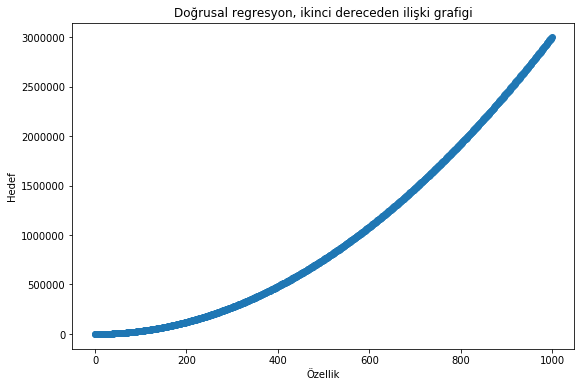

In [10]:
plt.figure(figsize=(9,6))
plt.scatter(dogrusal_mi["X"], tahmin)
plt.xlabel("Özellik")
plt.ylabel("Hedef")
plt.title('Doğrusal regresyon, ikinci dereceden ilişki grafigi')
plt.show()

Katsayilar dogru bir sekilde tahmin edilmis ve hedef degisken le ikinci dereceden degiskenler arasindaki iliski yakalanmistir. 

**Hata Terimi Ortalamada sifir**

In [11]:
tahmin = lrm.predict(X)

ValueError: shapes (96453,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
hatalar = Y-tahmin

print(" modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))

Modelin hatalarının ortalaması sıfırdır

In [ ]:
#Homoscedasticity

plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

In [ ]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

In [ ]:
print("Bartlett test değeri : {0:3g} ve p değeri : {1:.50f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.50f}".format(lev_stats[0], lev_stats[1]))

Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [ ]:
#Dusuk Coklu Dogrusallik/low multicollineartiy



In [ ]:
#Hata Terimleri birbirleriyle iliskisiz olmalidir. 


plt.figure(figsize=(10,9))
plt.plot(hatalar) 

In [ ]:
#Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. 

from statsmodels.tsa.stattools import acf 

In [ ]:
acf_data = acf(hatalar)

In [ ]:
plt.plot(acf_data[1:])

Hata terimleri arasindaki otokorelasyon oldukca yuksektir.

In [ ]:
#Ozellikler hatalarla iliskilendirilmemelidir.


rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Her iki test de hatalarimizin normal dagilmadigini gosterir. 